In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import joblib

# Function to extract features using VGG16
def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features.flatten()

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)

# Root directory of the dataset
dataset_dir_potato = '../img/Potato'
dataset_dir_corn = '../img/Corn'
dataset_dir_tomato = '../img/Tomato'

label_encoder = LabelEncoder()


In [2]:
def define_targets(dataset_dir):
    # Loop over the subdirectories and image files in the dataset directory
    X = []
    y = []
    for label in os.listdir(dataset_dir):
        label_dir = os.path.join(dataset_dir, label)
        if os.path.isdir(label_dir):
            for file in os.listdir(label_dir):
                # Construct the full image path
                img_path = os.path.join(label_dir, file)
                try:
                    # Extract features and append to list
                    features = extract_features(img_path, base_model)
                    X.append(features)
                    # Append the label
                    y.append(label)
                except Exception as e:
                    print(f"Error processing file {img_path}: {e}")
    return X, y

In [3]:
def train_test_split_func(X, y):
    y = label_encoder.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [12]:
def decision_tree(X_train, X_test, y_train, y_test):
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    
    return clf

In [13]:
def random_forest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    return clf

In [14]:
def svc(X_train, X_test, y_train, y_test):
    clf = SVC(kernel='linear', probability=True)
    clf.fit(X_train, y_train)
    
    return clf

In [15]:
def knn(X_train, X_test, y_train, y_test):
    clf = KNeighborsClassifier(n_neighbors=10)
    clf.fit(X_train, y_train)
    
    return clf

In [16]:
def gradient_boost(X_train, X_test, y_train, y_test):
    clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    return clf

In [9]:
# Definir os estimadores base
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(kernel='linear', probability=True)),
    ('knn', KNeighborsClassifier(n_neighbors=10))
]

# Definir o estimador final
final_estimator = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [17]:
def stacking(X_train, X_test, y_train, y_test, plant):
    # Configurar o StackingClassifier
    clf = StackingClassifier(
        estimators=estimators,
        final_estimator=final_estimator
    )
    
    # Treinar o modelo
    clf.fit(X_train, y_train)
    
    return clf

In [11]:
X_potato, y_potato = define_targets(dataset_dir_potato)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/s

In [18]:
X_train_potato, X_test_potato, y_train_potato, y_test_potato = train_test_split_func(X_potato, y_potato)

In [22]:
clfDT = decision_tree(X_train_potato, X_test_potato, y_train_potato, y_test_potato)

In [23]:
clfRF = random_forest(X_train_potato, X_test_potato, y_train_potato, y_test_potato)

In [34]:
clfSVC = svc(X_train_potato, X_test_potato, y_train_potato, y_test_potato)

In [25]:
clfKNN = knn(X_train_potato, X_test_potato, y_train_potato, y_test_potato)

In [26]:
clfGB = gradient_boost(X_train_potato, X_test_potato, y_train_potato, y_test_potato)

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [4]:
def plot_real_vs_pred(y_real, y_pred):
    plt.figure(figsize=(10, 6))
    
    # Plotar valores reais e preditos
    plt.plot(y_real, label="Valores Reais", marker='o')
    plt.plot(y_pred, label="Valores Preditos", marker='x')

    # Adicionar título e legendas
    plt.title("Real vs Predito")
    plt.xlabel("Amostra")
    plt.ylabel("Valor")
    plt.legend()
    plt.grid(True)
    
    # Mostrar o gráfico
    plt.show()


In [29]:
def calculate_errors(y_real, y_pred):
    mae = mean_absolute_error(y_real, y_pred)
    mse = mean_squared_error(y_real, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    
    return mae, mse, rmse


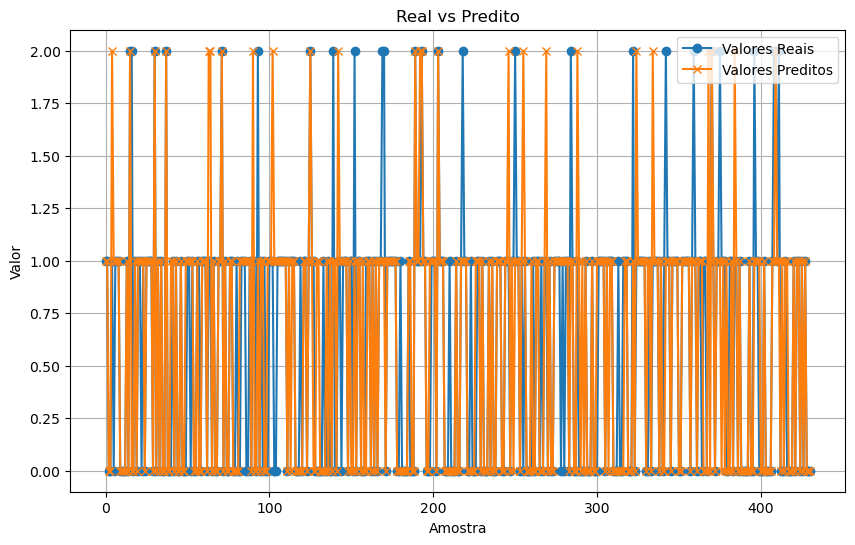

Mean Absolute Error (MAE): 0.22
Mean Squared Error (MSE): 0.23
Root Mean Squared Error (RMSE): 0.48


(0.21809744779582366, 0.2273781902552204, 0.47684189230312013)

In [31]:
predDT = clfDT.predict(X_test_potato)
plot_real_vs_pred(y_test_potato, predDT)
calculate_errors(y_test_potato, predDT)

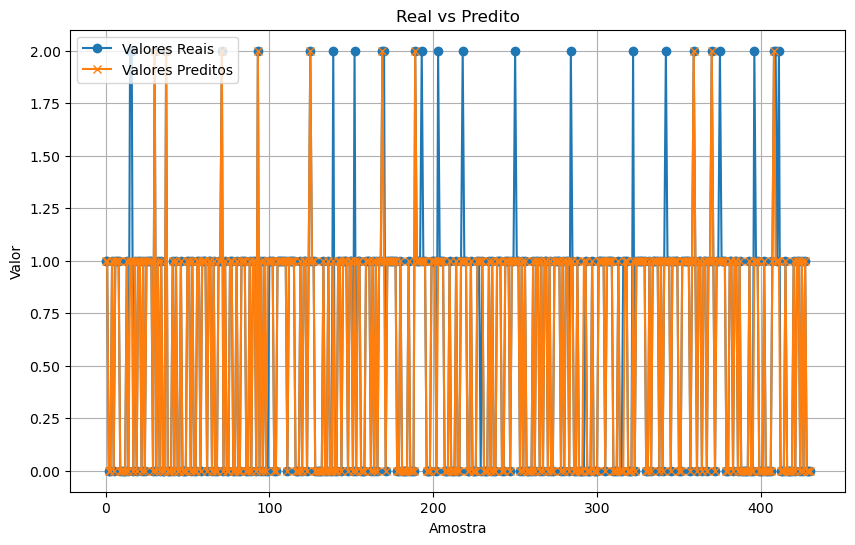

Mean Absolute Error (MAE): 0.05
Mean Squared Error (MSE): 0.05
Root Mean Squared Error (RMSE): 0.22


(0.04640371229698376, 0.04640371229698376, 0.21541520906608186)

In [32]:
predRF = clfRF.predict(X_test_potato)
plot_real_vs_pred(y_test_potato, predRF)
calculate_errors(y_test_potato, predRF)

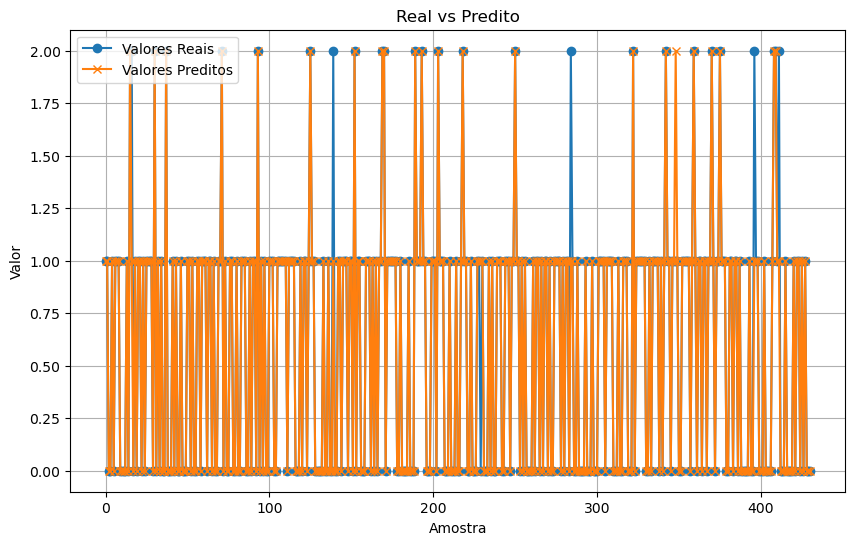

Mean Absolute Error (MAE): 0.02
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.13


(0.016241299303944315, 0.016241299303944315, 0.1274413563328024)

In [35]:
predSVC = clfSVC.predict(X_test_potato)
plot_real_vs_pred(y_test_potato, predSVC)
calculate_errors(y_test_potato, predSVC)

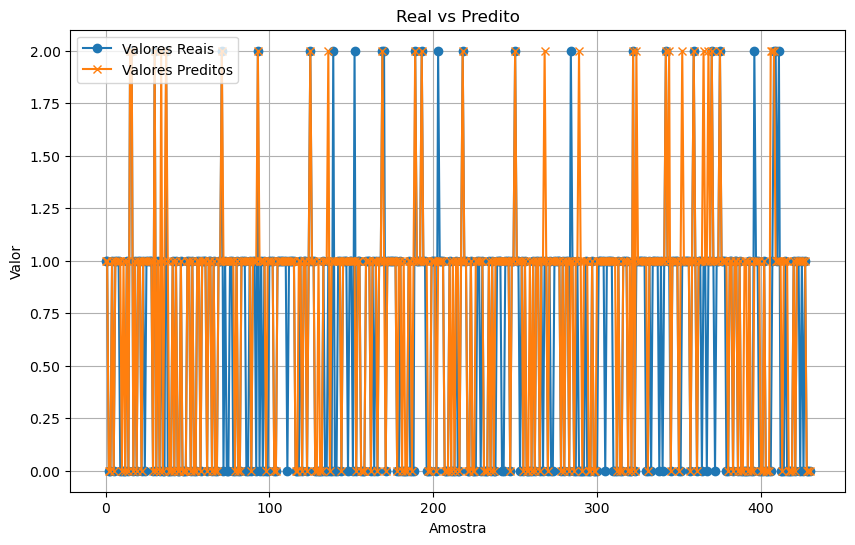

Mean Absolute Error (MAE): 0.21
Mean Squared Error (MSE): 0.22
Root Mean Squared Error (RMSE): 0.47


(0.2088167053364269, 0.21809744779582366, 0.46700904466168924)

In [36]:
predKNN = clfKNN.predict(X_test_potato)
plot_real_vs_pred(y_test_potato, predKNN)
calculate_errors(y_test_potato, predKNN)

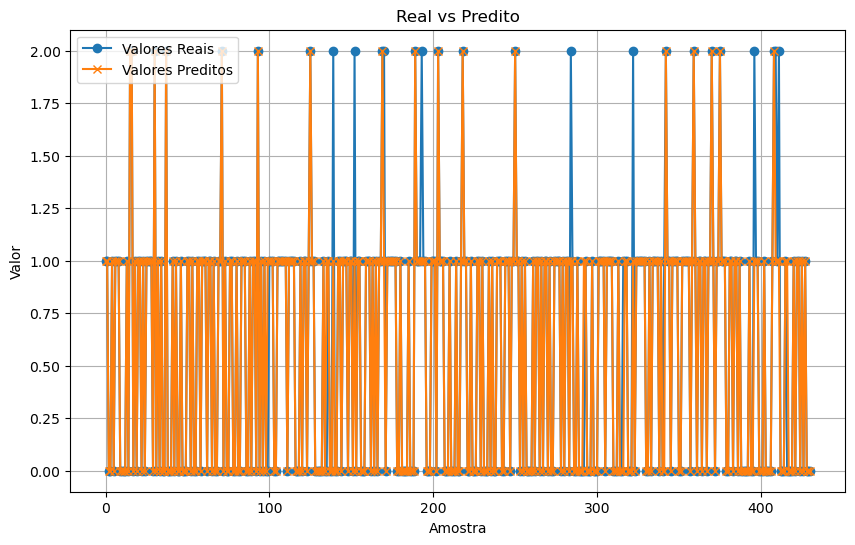

Mean Absolute Error (MAE): 0.03
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.19


(0.03480278422273782, 0.03480278422273782, 0.1865550434127628)

In [37]:
predGB = clfGB.predict(X_test_potato)
plot_real_vs_pred(y_test_potato, predGB)
calculate_errors(y_test_potato, predGB)

In [38]:
from google.cloud import storage
import joblib
import tempfile

temp_dir = tempfile.mkdtemp()

# Configuração do Google Cloud Storage
BUCKET_NAME = 'ensemble-models-tcc'



In [39]:
def load_model(name_model):
    client = storage.Client()
    bucket = client.bucket(BUCKET_NAME)
    blob = bucket.blob(f"{name_model}.joblib")
    
    # Baixar o modelo para um diretório temporário
    temp_model_path = os.path.join(temp_dir, f"{name_model}.joblib")
    blob.download_to_filename(temp_model_path)
    
    # Carregar o modelo
    model = joblib.load(temp_model_path)
    return model


In [40]:
predS = load_model("clf_potato")

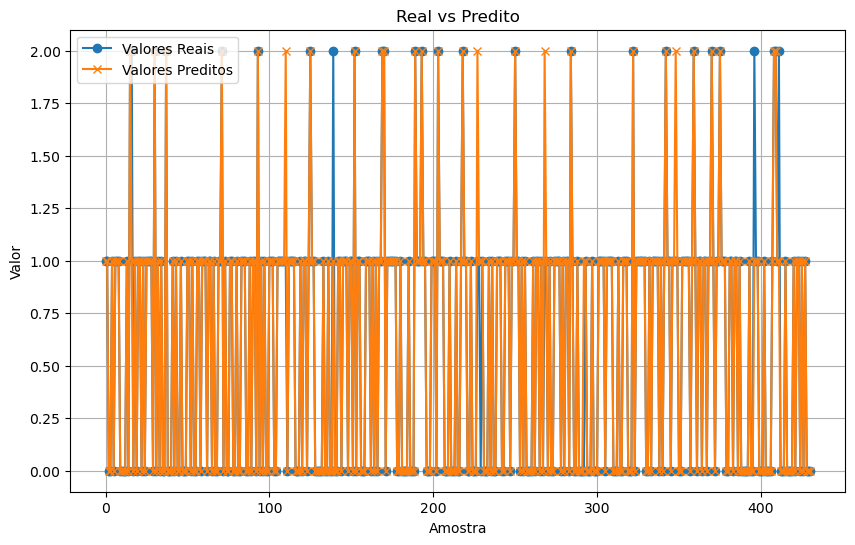

Mean Absolute Error (MAE): 0.02
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.15


(0.02320185614849188, 0.02320185614849188, 0.15232155510134435)

In [42]:
predST = predS.predict(X_test_potato)
plot_real_vs_pred(y_test_potato, predST)
calculate_errors(y_test_potato, predST)

In [7]:
y_pred_test_without_opencv = [1]*30
y_pred_test_with_opencv = [1]*30
y_real_test = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

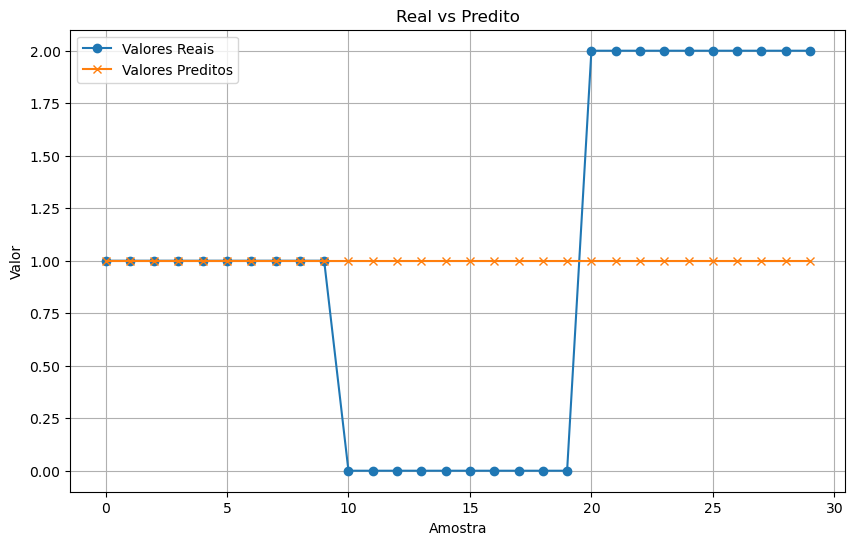

In [8]:
plot_real_vs_pred(y_real_test, y_pred_test_without_opencv)